
   Import


In [ ]:
# Import libraries
import pandas as pd
import numpy as np

Load CSV

In [ ]:
crime_df = pd.read_csv("/content/senior_citizen_crime_2022 6a2.csv")
police_df = pd.read_csv("/content/Police_and_Court_Disposal_6a4+6a6.csv")

Display Dataset Info

In [ ]:
print("Crime Data (6A.2):")
print(crime_df.head(), "\n")
print(crime_df.info(), "\n")

print("Police & Court Disposal Data (6A.4 + 6A.6):")
print(police_df.head(), "\n")
print(police_df.info(), "\n")

Crime Data (6A.2):
         State/UT                                         Crime Type  \
0  Andhra Pradesh                               Murder (Sec.302 IPC)   
1  Andhra Pradesh  Culpable Homicide not amounting to Murder (Sec...   
2  Andhra Pradesh             Attempt to Commit Murder (Sec.307 IPC)   
3  Andhra Pradesh  Attempt to Commit Culpable Homicide (Sec.308 IPC)   
4  Andhra Pradesh                    Simple Hurt (Sec.323 & 324 IPC)   

   Number of Crimes  
0                81  
1                 2  
2                35  
3                 0  
4               593   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   State/UT          684 non-null    object
 1   Crime Type        684 non-null    object
 2   Number of Crimes  684 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 16.2+ KB
None 

Police & Court Disposa

Replace Missing Values


In [ ]:
crime_df.replace(['-', '–', '--', 'NA', 'na', ''], np.nan, inplace=True)
police_df.replace(['-', '–', '--', 'NA', 'na', ''], np.nan, inplace=True)


Convert to Numeric


In [ ]:
crime_df = crime_df.apply(pd.to_numeric, errors='ignore')
police_df = police_df.apply(pd.to_numeric, errors='ignore')

Missing Values Summary

In [ ]:
print("Missing values in Crime Data:\n", crime_df.isnull().sum(), "\n")
print("Missing values in Police/Court Data:\n", police_df.isnull().sum(), "\n")


Missing values in Crime Data:
 State/UT            0
Crime Type          0
Number of Crimes    0
dtype: int64 

Missing values in Police/Court Data:
 State/UT                                      0
Total Cases for Investigation (Police )       0
Cases Charge-Sheeted                          0
Cases Pending Investigation (End of Year)     0
Chargesheeting Rate (%)                       0
Pendency Percentage (Police)                  0
Total Cases for Trial (Court)                 0
Cases Convicted                               0
Cases Acquitted                               0
Conviction Rate (%)                           0
Pendency Percentage (Court)                   0
dtype: int64 



Save Cleaned CSV

In [ ]:
crime_df.to_csv("Cleaned_Senior_Citizen_Crime_6A2.csv", index=False)
police_df.to_csv("Cleaned_Police_Court_Disposal_6A4_6A6.csv", index=False)

print("✅ Cleaning complete! Cleaned files saved.")

✅ Cleaning complete! Cleaned files saved.


STEP 2: EXPLORATORY DATA ANALYSIS (EDA)

In [ ]:
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load cleaned datasets (from previous step)
crime_df = pd.read_csv("/content/Cleaned_Senior_Citizen_Crime_6A2.csv")
police_df = pd.read_csv("/content/Cleaned_Police_Court_Disposal_6A4_6A6.csv")
police_df.columns = police_df.columns.str.strip() # Ensure column names are stripped of whitespace

# Set Seaborn style
sns.set(style="whitegrid", palette="pastel")

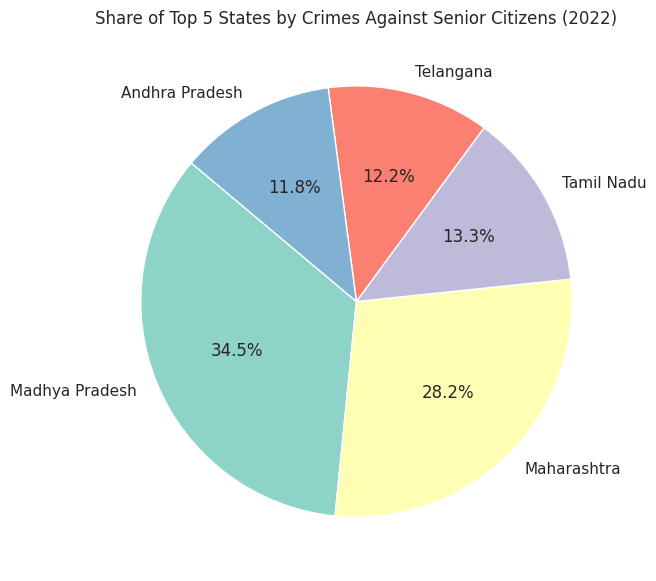

In [ ]:
#  PIE CHART — Share of Top 5 States by Crimes
plt.figure(figsize=(7,7))
top_states = crime_df.groupby('State/UT')['Number of Crimes'].sum().sort_values(ascending=False).head(5)
plt.pie(top_states, labels=top_states.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
plt.title("Share of Top 5 States by Crimes Against Senior Citizens (2022)")
plt.show()

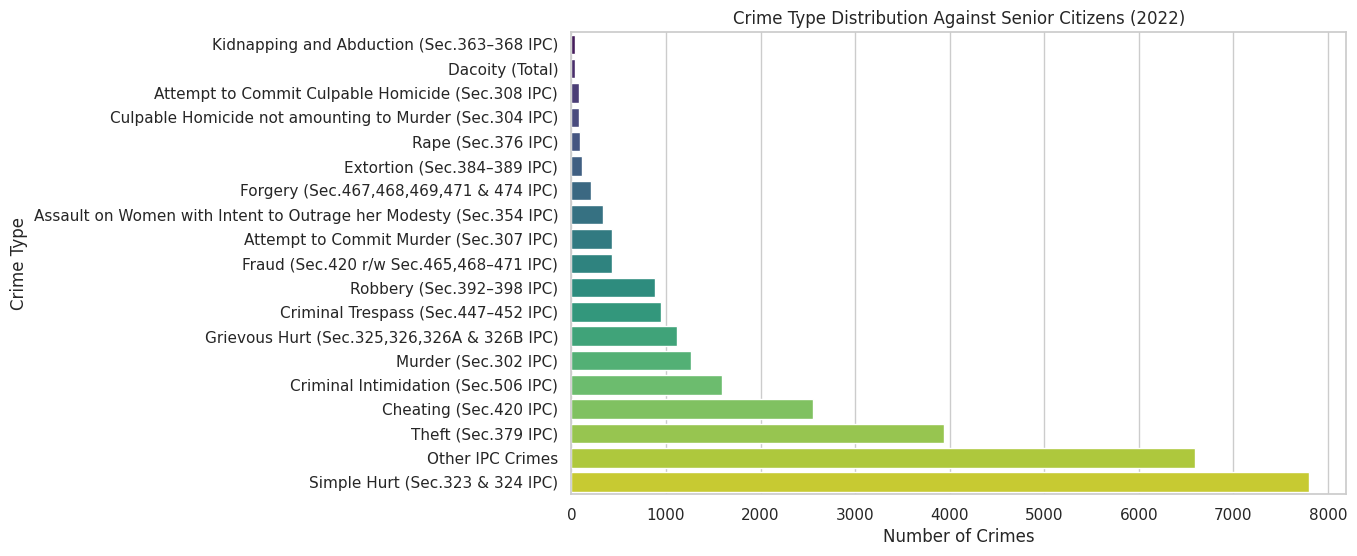

In [ ]:
#  HORIZONTAL BAR — Crime Type Distribution
plt.figure(figsize=(10,6))
crime_by_type = crime_df.groupby('Crime Type')['Number of Crimes'].sum().sort_values(ascending=True)
sns.barplot(x=crime_by_type.values, y=crime_by_type.index, palette="viridis")
plt.title("Crime Type Distribution Against Senior Citizens (2022)")
plt.xlabel("Number of Crimes")
plt.ylabel("Crime Type")
plt.show()

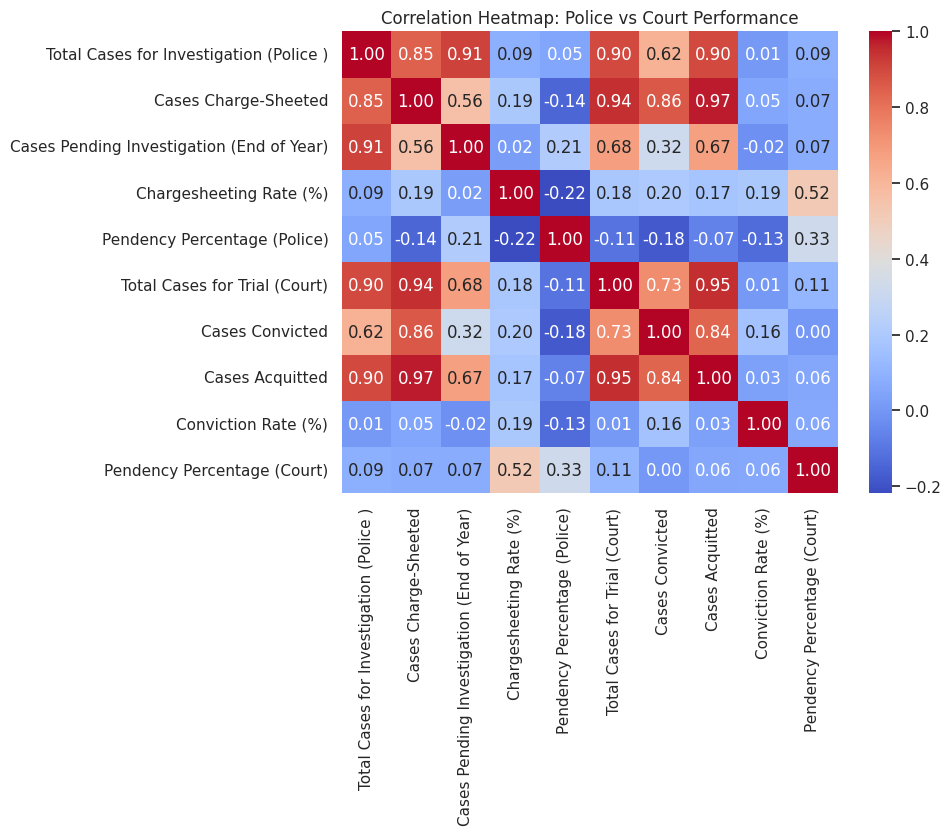

In [ ]:
#  HEATMAP — Police & Court Performance Correlation
plt.figure(figsize=(8,6))
numeric_cols = police_df.select_dtypes(include=['number'])
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Police vs Court Performance")
plt.show()

Using Chargesheeting Rate column: 'Chargesheeting Rate (%)'
Using Conviction Rate column: 'Conviction Rate (%)'


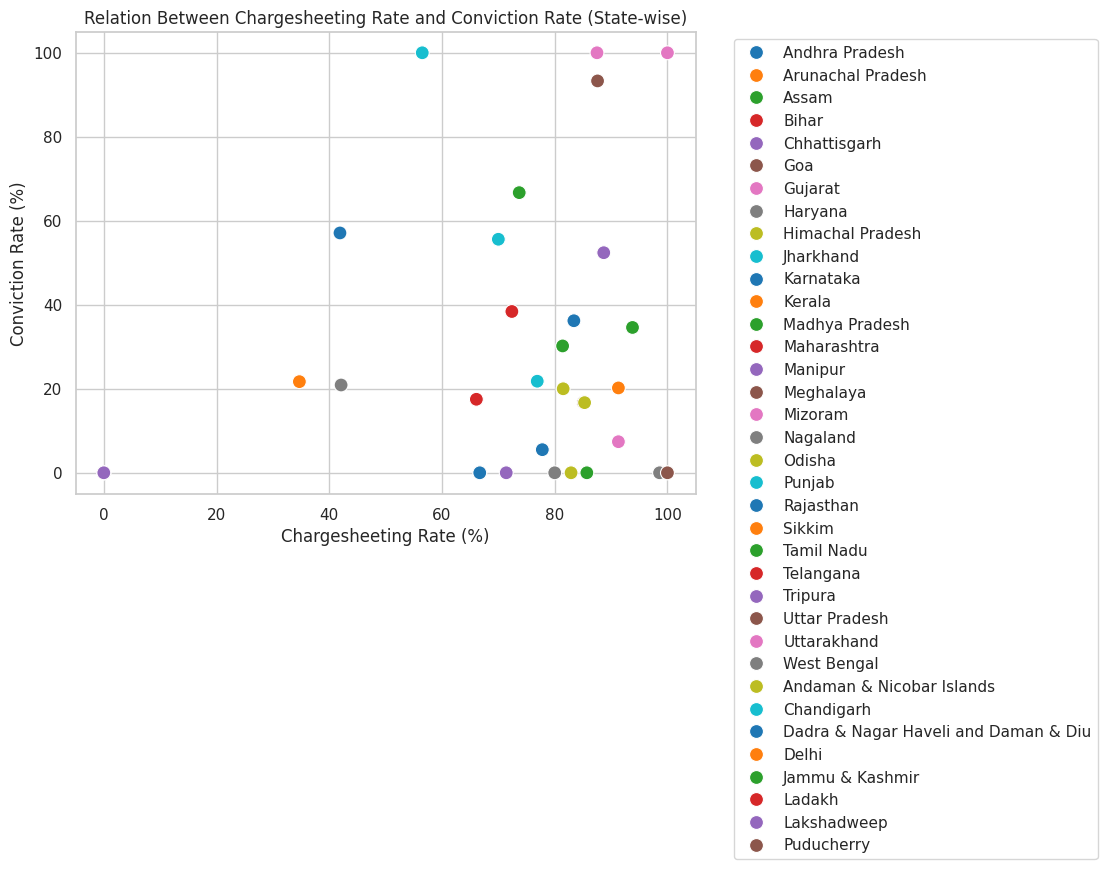

In [ ]:
# Find the exact column names for Chargesheeting Rate and Conviction Rate
# This ensures we pick up any subtle differences or context-specific naming
chargesheeting_col = next((col for col in police_df.columns if 'Chargesheeting Rate' in col and '%' in col), None)
conviction_col = next((col for col in police_df.columns if 'Conviction Rate' in col and '%' in col), None)

if chargesheeting_col is None:
    raise ValueError("Chargesheeting Rate column not found in police_df.")
if conviction_col is None:
    raise ValueError("Conviction Rate column not found in police_df.")

print(f"Using Chargesheeting Rate column: '{chargesheeting_col}'")
print(f"Using Conviction Rate column: '{conviction_col}'")

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=police_df,
    x=chargesheeting_col,
    y=conviction_col,
    hue='State/UT',
    palette='tab10',
    s=100
)
plt.title("Relation Between Chargesheeting Rate and Conviction Rate (State-wise)")
plt.xlabel("Chargesheeting Rate (%)")
plt.ylabel("Conviction Rate (%)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

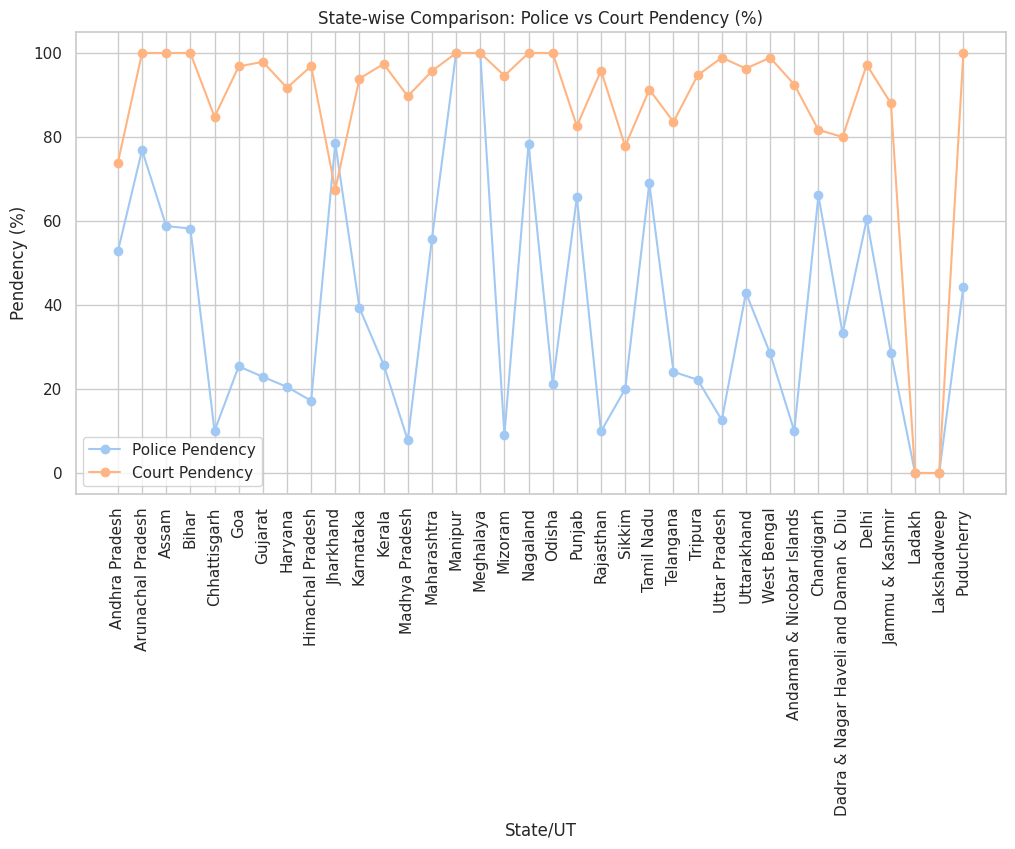

In [ ]:
#  LINE CHART — State-wise Pending Investigation vs Court Pendency
plt.figure(figsize=(12,6))
plt.plot(police_df['State/UT'], police_df['Pendency Percentage (Police)'], marker='o', label='Police Pendency')
plt.plot(police_df['State/UT'], police_df['Pendency Percentage (Court)'], marker='o', label='Court Pendency')
plt.title("State-wise Comparison: Police vs Court Pendency (%)")
plt.xlabel("State/UT")
plt.ylabel("Pendency (%)")
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

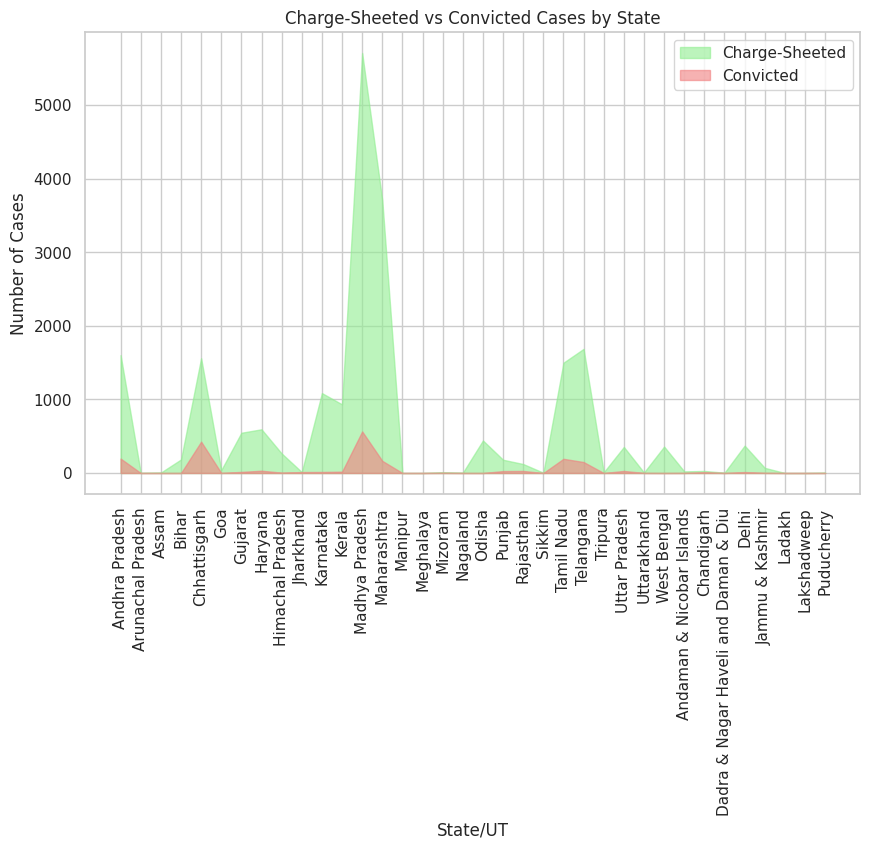

In [ ]:
plt.figure(figsize=(10,6))
plt.fill_between(police_df['State/UT'],
                 police_df['Cases Charge-Sheeted'],
                 color="lightgreen", alpha=0.6, label='Charge-Sheeted')
plt.fill_between(police_df['State/UT'],
                 police_df['Cases Convicted'],
                 color="lightcoral", alpha=0.6, label='Convicted')
plt.xticks(rotation=90)
plt.title("Charge-Sheeted vs Convicted Cases by State")
plt.xlabel("State/UT")
plt.ylabel("Number of Cases")
plt.legend()
plt.show()

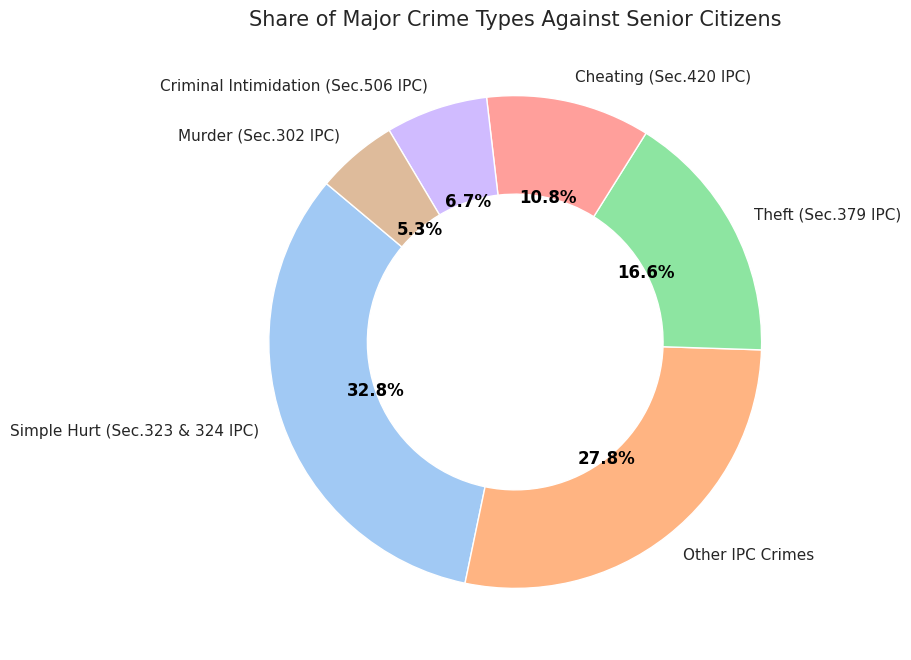

In [ ]:
import numpy as np

crime_type_total = crime_df.groupby("Crime Type")["Number of Crimes"].sum().sort_values(ascending=False).head(6)

fig, ax = plt.subplots(figsize=(8,8))
wedges, texts, autotexts = ax.pie(
    crime_type_total,
    labels=crime_type_total.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=sns.color_palette("pastel"),
    wedgeprops={'width':0.4}
)
plt.setp(autotexts, size=12, weight="bold", color="black")
plt.title("Share of Major Crime Types Against Senior Citizens", fontsize=15)
plt.show()


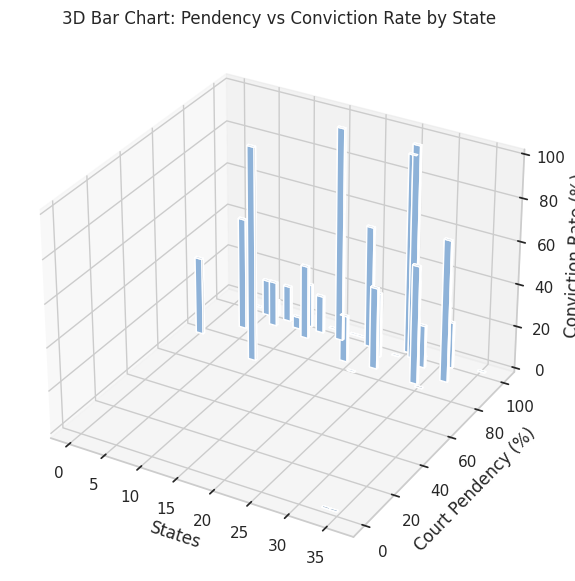

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

x = np.arange(len(police_df['State/UT']))
y = police_df['Pendency Percentage (Court)']
z = np.zeros(len(x))

dx = np.ones(len(x))
dy = np.ones(len(x))
dz = police_df['Conviction Rate (%)']

ax.bar3d(x, y, z, dx, dy, dz, shade=True)
ax.set_xlabel('States')
ax.set_ylabel('Court Pendency (%)')
ax.set_zlabel('Conviction Rate (%)')
ax.set_title('3D Bar Chart: Pendency vs Conviction Rate by State')
plt.show()

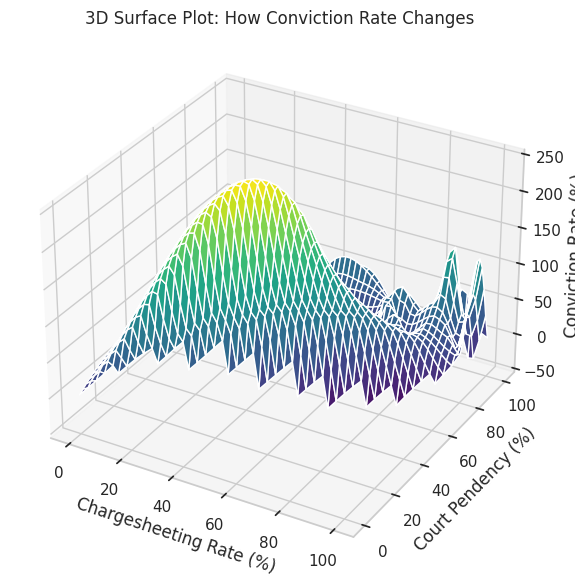

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

x = police_df['Chargesheeting Rate (%)']
y = police_df['Pendency Percentage (Court)']
z = police_df['Conviction Rate (%)']

xi = np.linspace(min(x), max(x), 50)
yi = np.linspace(min(y), max(y), 50)
X, Y = np.meshgrid(xi, yi)
Z = griddata((x, y), z, (X, Y), method='cubic')

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('Chargesheeting Rate (%)')
ax.set_ylabel('Court Pendency (%)')
ax.set_zlabel('Conviction Rate (%)')
ax.set_title('3D Surface Plot: How Conviction Rate Changes')
plt.show()

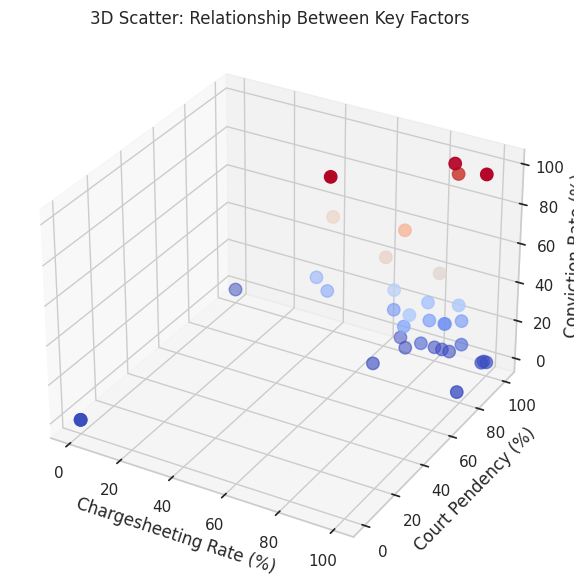

In [ ]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    police_df['Chargesheeting Rate (%)'],
    police_df['Pendency Percentage (Court)'],
    police_df['Conviction Rate (%)'],
    c=police_df['Conviction Rate (%)'],
    cmap='coolwarm', s=80
)

ax.set_xlabel('Chargesheeting Rate (%)')
ax.set_ylabel('Court Pendency (%)')
ax.set_zlabel('Conviction Rate (%)')
ax.set_title('3D Scatter: Relationship Between Key Factors')
plt.show()

 modeling with explainability (using SHAP), and visualization:

In [ ]:
#  Install LIME & SHAP (if not installed)
!pip install -q lime shap

In [ ]:
#  Imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import shap
from lime import lime_tabular
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#  Load the cleaned police df (if not in memory)
police_df = pd.read_csv("/content/Cleaned_Police_Court_Disposal_6A4_6A6.csv")
police_df.columns = police_df.columns.str.strip()

In [ ]:
#  Define features & target (use the exact column names in your dataframe)
features = [
    'Total Cases for Investigation (Police )',
    'Cases Charge-Sheeted',
    'Cases Pending Investigation (End of Year)',
    'Chargesheeting Rate (%)',
    'Pendency Percentage (Police)',
    'Total Cases for Trial (Court)',
    'Cases Acquitted',
    'Pendency Percentage (Court)'
]

target = 'Conviction Rate (%)'

In [ ]:
#  Quick checks: drop rows where target is missing (or fill with 0 if you prefer)
df_model = police_df.copy()
# Corrected feature names
features = [
    'Total Cases for Investigation (Police )',
    'Cases Charge-Sheeted',
    'Cases Pending Investigation (End of Year)',
    'Chargesheeting Rate (%)',
    'Pendency Percentage (Police)',
    'Total Cases for Trial (Court)',
    'Cases Acquitted',
    'Pendency Percentage (Court)'
]
target = 'Conviction Rate (%)'

df_model[features] = df_model[features].apply(pd.to_numeric, errors='coerce')
df_model[target] = pd.to_numeric(df_model[target], errors='coerce')

# Option: drop rows where target is NA (safer for modelling)
df_model = df_model.dropna(subset=[target])

# Fill remaining feature NaNs with 0 (or you can use median)
df_model[features] = df_model[features].fillna(0)

In [ ]:
#  Build X and y
X = df_model[features].values
y = df_model[target].values

In [ ]:
#  Train-test split
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    X, y, df_model.index.values, test_size=0.2, random_state=42
)

In [ ]:
#  Scale features
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [ ]:
#  Train a simple neural network regressor
model = MLPRegressor(hidden_layer_sizes=(12,8), max_iter=2000, random_state=42)
model.fit(X_train_s, y_train)

MLPRegressor(hidden_layer_sizes=(12, 8), max_iter=2000, random_state=42)

In [ ]:
#  Evaluate
y_pred = model.predict(X_test_s)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 :", r2_score(y_test, y_pred))

MAE: 80.62907190503581
R2 : -5.404357234296708


  0%|          | 0/8 [00:00<?, ?it/s]

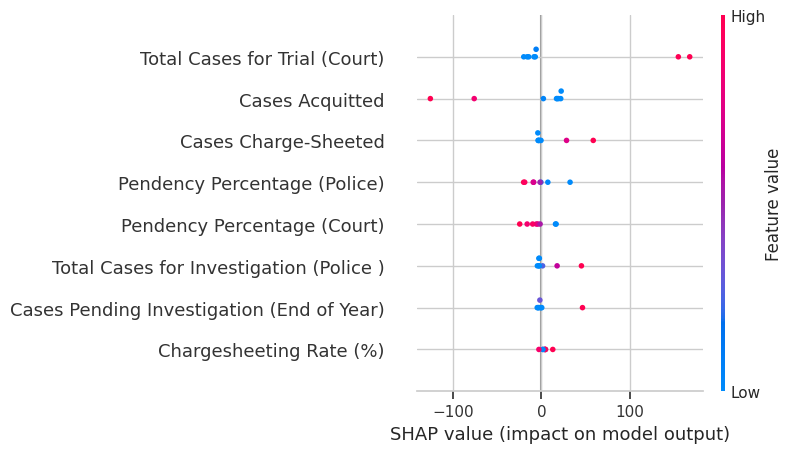

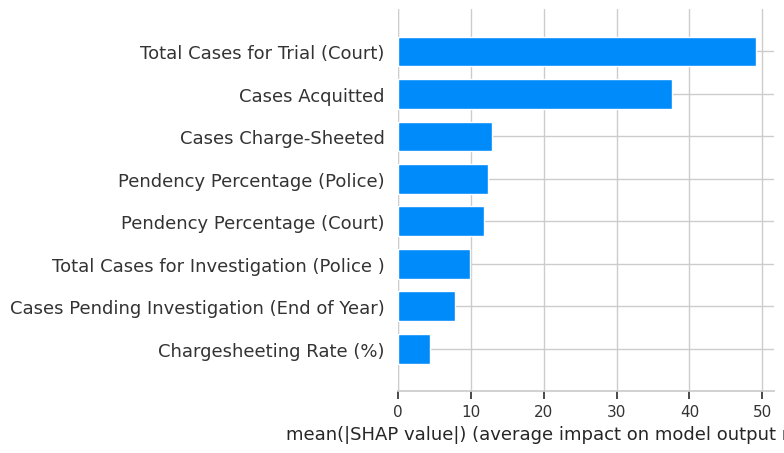

<Figure size 640x480 with 0 Axes>

In [ ]:
#  SHAP: global explanations
# Use KernelExplainer for complex black-box models
# For MLPRegressor, use shap.KernelExplainer
explainer = shap.KernelExplainer(model.predict, shap.sample(X_train_s, 10)) # Use a sample of training data as background
shap_values = explainer.shap_values(X_test_s)

# SHAP summary (beeswarm) - global
shap.summary_plot(shap_values, pd.DataFrame(X_test_s, columns=features), show=True)

# SHAP bar plot (global importance)
shap.summary_plot(shap_values, pd.DataFrame(X_test_s, columns=features), plot_type="bar", show=True)

# Save SHAP plot images (optional)
plt.savefig("shap_summary.png", bbox_inches='tight')

[('Cases Acquitted > 0.09', -39.76254114773414),
 ('Total Cases for Trial (Court) > 0.34', 25.603756574438314),
 ('Pendency Percentage (Police) <= -0.70', 16.951731050344172),
 ('-0.06 < Pendency Percentage (Court) <= 0.37', -9.573875003694925),
 ('Total Cases for Investigation (Police ) > 0.02', 6.526588391219812),
 ('Chargesheeting Rate (%) > 0.61', 2.6231162807111406),
 ('Cases Pending Investigation (End of Year) > -0.11', -2.3572781148034405),
 ('Cases Charge-Sheeted > 0.26', 1.517429422748469)]

State: Madhya Pradesh  Actual Conviction Rate: 34.6  Model predicted: 165.69


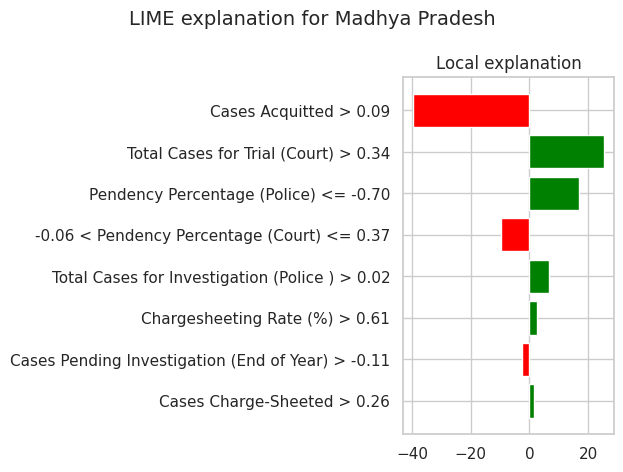

In [ ]:
# 12) LIME: local explanation for one state
# Build LIME explainer on unscaled data (LIME expects the same space as model.predict input;
# we will pass scaled X to predict, but create LimeTabular with training data in scaled space).
explainer_lime = lime_tabular.LimeTabularExplainer(
    training_data=X_train_s,
    feature_names=features,
    mode='regression'
)

# Choose a state to explain: by index from df_model.
# Option A: choose a state name (recommended)
state_to_explain = "Madhya Pradesh"   # change to any state/UT present in your dataset
if state_to_explain in df_model['State/UT'].values:
    row_idx = df_model[df_model['State/UT'] == state_to_explain].index[0]
    # Get scaled row for LIME
    scaled_row = scaler.transform(df_model.loc[[row_idx], features].values)[0]
    exp = explainer_lime.explain_instance(
        data_row=scaled_row,
        predict_fn=lambda x: model.predict(x),
        num_features=8
    )
    # Show explanation in notebook (table + local feature impacts)
    display(exp.as_list())
    # Also render a matplotlib friendly plot:
    fig = exp.as_pyplot_figure()
    fig.suptitle(f"LIME explanation for {state_to_explain}", fontsize=14)
    fig.tight_layout()
    fig.savefig(f"lime_{state_to_explain}.png", bbox_inches='tight')
else:
    print(f"{state_to_explain} not found in dataset; choose another State/UT.")

# 13) How to get the model's prediction for that state and the actual value:
if state_to_explain in df_model['State/UT'].values:
    actual = df_model.loc[row_idx, target]
    prediction = model.predict(scaler.transform(df_model.loc[[row_idx], features].values))[0]
    print(f"State: {state_to_explain}  Actual Conviction Rate: {actual}  Model predicted: {prediction:.2f}")

In [ ]:
# ✅ Show text-based explanation for one state
print("\n🔍 LIME Explanation in words:")
for feature, weight in exp.as_list():
    direction = "increased" if weight > 0 else "decreased"
    print(f"- {feature} {direction} the predicted Conviction Rate by {abs(weight):.2f}")



🔍 LIME Explanation in words:
- Cases Acquitted > 0.09 decreased the predicted Conviction Rate by 39.76
- Total Cases for Trial (Court) > 0.34 increased the predicted Conviction Rate by 25.60
- Pendency Percentage (Police) <= -0.70 increased the predicted Conviction Rate by 16.95
- -0.06 < Pendency Percentage (Court) <= 0.37 decreased the predicted Conviction Rate by 9.57
- Total Cases for Investigation (Police ) > 0.02 increased the predicted Conviction Rate by 6.53
- Chargesheeting Rate (%) > 0.61 increased the predicted Conviction Rate by 2.62
- Cases Pending Investigation (End of Year) > -0.11 decreased the predicted Conviction Rate by 2.36
- Cases Charge-Sheeted > 0.26 increased the predicted Conviction Rate by 1.52


In [ ]:
# ================================
# SHAP + LIME: Plain-English Explainability
# Place this cell right AFTER your SHAP/LIME code has run
# Requires: features, shap_values, X_test_s, df_model, scaler, model
# ================================
import numpy as np
import pandas as pd
from IPython.display import Markdown, display

# --- 1A) SHAP summary in words (global) ---
Xtest_df = pd.DataFrame(X_test_s, columns=features)

# Mean absolute SHAP per feature (importance ranking)
mean_abs_shap = np.mean(np.abs(shap_values), axis=0)
rank_idx = np.argsort(mean_abs_shap)[::-1]
ranked_features = [(features[i], mean_abs_shap[i]) for i in rank_idx]

# Direction: correlation between feature value and its SHAP value
dirs = []
for i in rank_idx:
    fvals = Xtest_df.iloc[:, i].values
    svals = shap_values[:, i]
    if np.all(np.isnan(svals)) or np.std(fvals)==0:
        dirs.append((features[i], "mixed/unclear"))
    else:
        corr = np.corrcoef(fvals, svals)[0,1]
        if np.isnan(corr):
            dirs.append((features[i], "mixed/unclear"))
        elif corr > 0.05:
            dirs.append((features[i], "increases (↑)"))
        elif corr < -0.05:
            dirs.append((features[i], "decreases (↓)"))
        else:
            dirs.append((features[i], "mixed/unclear"))

# Build markdown bullets for top-6 features
lines = []
lines.append("### 🔍 SHAP — What matters most overall (global)")
lines.append("The model’s top drivers of **Conviction Rate (%)** and their usual effect are:")
for (fname,_), (_,direction) in zip(ranked_features[:6], dirs[:6]):
    lines.append(f"- **{fname}** → {direction} the prediction")

display(Markdown("\n".join(lines)))

# --- 1B) LIME summary in words (local) ---
def explain_state_with_lime(state_name, num_features=8):
    from lime import lime_tabular
    # Build explainer on the same scaled space we used to train
    explainer_lime = lime_tabular.LimeTabularExplainer(
        training_data=X_train_s,
        feature_names=features,
        mode='regression'
    )
    if state_name not in df_model['State/UT'].values:
        display(Markdown(f"**State '{state_name}' not found.**"))
        return
    row_idx = df_model[df_model['State/UT'] == state_name].index[0]
    x_row_scaled = scaler.transform(df_model.loc[[row_idx], features].values)[0]
    exp = explainer_lime.explain_instance(
        data_row=x_row_scaled,
        predict_fn=lambda x: model.predict(x),
        num_features=num_features
    )

    # Print the explanation as plain sentences
    display(Markdown(f"### 💬 LIME — Why **{state_name}** got this prediction (local)"))
    for feat, weight in exp.as_list():
        direction = "increased (↑)" if weight > 0 else "decreased (↓)"
        display(Markdown(f"- **{feat}** {direction} the predicted Conviction Rate by **{abs(weight):.2f}** (model units)"))

    # Also show actual vs predicted
    actual = df_model.loc[row_idx, 'Conviction Rate (%)']
    pred = model.predict(scaler.transform(df_model.loc[[row_idx], features].values))[0]
    display(Markdown(f"**Actual:** {actual:.2f}% &nbsp;&nbsp; **Predicted:** {pred:.2f}%))"))

# 👉 Run this with any state you want to explain (example):
# explain_state_with_lime("Madhya Pradesh")

### 🔍 SHAP — What matters most overall (global)
The model’s top drivers of **Conviction Rate (%)** and their usual effect are:
- **Total Cases for Trial (Court)** → increases (↑) the prediction
- **Cases Acquitted** → decreases (↓) the prediction
- **Cases Charge-Sheeted** → increases (↑) the prediction
- **Pendency Percentage (Police)** → decreases (↓) the prediction
- **Pendency Percentage (Court)** → decreases (↓) the prediction
- **Total Cases for Investigation (Police )** → increases (↑) the prediction

the target value is different

In [ ]:
#  Load the cleaned police df (if not in memory)
police_df = pd.read_csv("/content/Cleaned_Police_Court_Disposal_6A4_6A6.csv")
police_df.columns = police_df.columns.str.strip()

In [ ]:
#  Define features & target (use the exact column names in your dataframe)
features = [
    'Total Cases for Investigation (Police )',
    'Cases Charge-Sheeted',
    'Cases Pending Investigation (End of Year)',
    'Chargesheeting Rate (%)',
    'Pendency Percentage (Police)',
    'Total Cases for Trial (Court)',
    'Cases Acquitted',
    'Pendency Percentage (Court)'
]

target = 'Chargesheeting Rate (%)'

In [ ]:
#  Quick checks: drop rows where target is missing (or fill with 0 if you prefer)
df_model = police_df.copy()
# Corrected feature names
features = [
    'Total Cases for Investigation (Police )',
    'Cases Charge-Sheeted',
    'Cases Pending Investigation (End of Year)',
    'Chargesheeting Rate (%)',
    'Pendency Percentage (Police)',
    'Total Cases for Trial (Court)',
    'Cases Acquitted',
    'Pendency Percentage (Court)'
]
target = 'Chargesheeting Rate (%)'

df_model[features] = df_model[features].apply(pd.to_numeric, errors='coerce')
df_model[target] = pd.to_numeric(df_model[target], errors='coerce')

# Option: drop rows where target is NA (safer for modelling)
df_model = df_model.dropna(subset=[target])

# Fill remaining feature NaNs with 0 (or you can use median)
df_model[features] = df_model[features].fillna(0)

In [ ]:
#  Build X and y
X = df_model[features].values
y = df_model[target].values

In [ ]:
#  Train-test split
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    X, y, df_model.index.values, test_size=0.2, random_state=42
)

In [ ]:
#  Scale features
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [ ]:
#  Train a simple neural network regressor
model = MLPRegressor(hidden_layer_sizes=(12,8), max_iter=2000, random_state=42)
model.fit(X_train_s, y_train)

MLPRegressor(hidden_layer_sizes=(12, 8), max_iter=2000, random_state=42)

In [ ]:
#  Evaluate
y_pred = model.predict(X_test_s)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 :", r2_score(y_test, y_pred))

MAE: 53.216146846373015
R2 : -17.846975088300223


  0%|          | 0/8 [00:00<?, ?it/s]

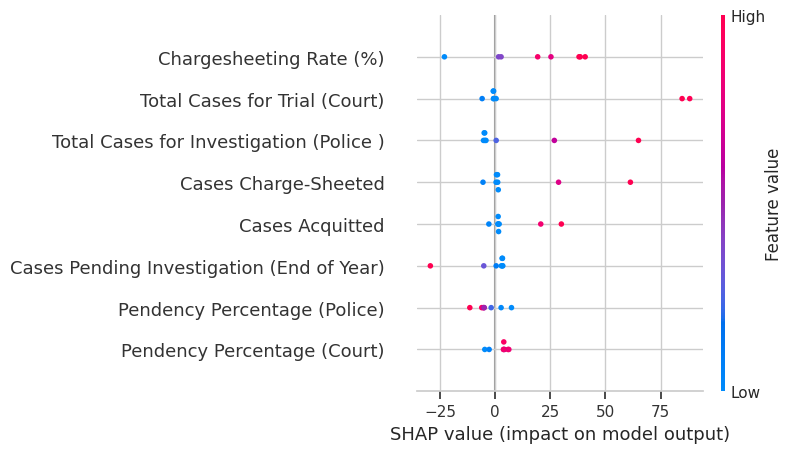

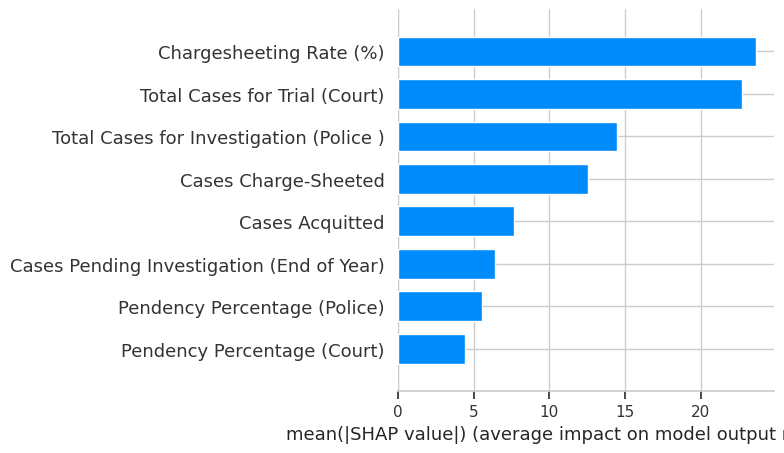

<Figure size 640x480 with 0 Axes>

In [ ]:
# SHAP: global explanations
# Use KernelExplainer for complex black-box models
# For MLPRegressor, use shap.KernelExplainer
explainer = shap.KernelExplainer(model.predict, shap.sample(X_train_s, 10)) # Use a sample of training data as background
shap_values = explainer.shap_values(X_test_s)

# SHAP summary (beeswarm) - global
shap.summary_plot(shap_values, pd.DataFrame(X_test_s, columns=features), show=True)

# SHAP bar plot (global importance)
shap.summary_plot(shap_values, pd.DataFrame(X_test_s, columns=features), plot_type="bar", show=True)

# Save SHAP plot images (optional)
plt.savefig("shap_summary.png", bbox_inches='tight')

[('Chargesheeting Rate (%) > 0.61', 28.613560072239157),
 ('Pendency Percentage (Police) <= -0.70', 10.696328489555682),
 ('Cases Pending Investigation (End of Year) > -0.11', -9.335320094537984),
 ('Total Cases for Investigation (Police ) > 0.02', 6.807705363100125),
 ('Cases Acquitted > 0.09', -5.832487826618044),
 ('Cases Charge-Sheeted > 0.26', -4.885416040263614),
 ('-0.06 < Pendency Percentage (Court) <= 0.37', 2.0764649602988627),
 ('Total Cases for Trial (Court) > 0.34', -1.037558361725579)]

State: Madhya Pradesh  Actual Chargesheet Rate: 93.8  Model predicted: 301.88


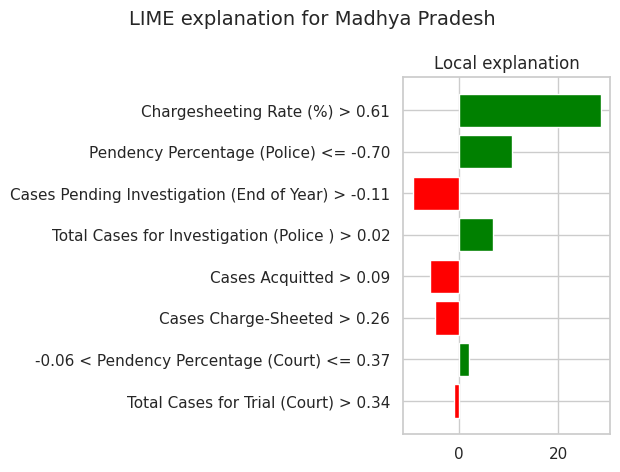

In [ ]:
# LIME: local explanation for one state
# Build LIME explainer on unscaled data (LIME expects the same space as model.predict input;
# we will pass scaled X to predict, but create LimeTabular with training data in scaled space).
explainer_lime = lime_tabular.LimeTabularExplainer(
    training_data=X_train_s,
    feature_names=features,
    mode='regression'
)

# Choose a state to explain: by index from df_model.
# Option A: choose a state name (recommended)
state_to_explain = "Madhya Pradesh"   # change to any state/UT present in your dataset
if state_to_explain in df_model['State/UT'].values:
    row_idx = df_model[df_model['State/UT'] == state_to_explain].index[0]
    # Get scaled row for LIME
    scaled_row = scaler.transform(df_model.loc[[row_idx], features].values)[0]
    exp = explainer_lime.explain_instance(
        data_row=scaled_row,
        predict_fn=lambda x: model.predict(x),
        num_features=8
    )
    # Show explanation in notebook (table + local feature impacts)
    display(exp.as_list())
    # Also render a matplotlib friendly plot:
    fig = exp.as_pyplot_figure()
    fig.suptitle(f"LIME explanation for {state_to_explain}", fontsize=14)
    fig.tight_layout()
    fig.savefig(f"lime_{state_to_explain}.png", bbox_inches='tight')
else:
    print(f"{state_to_explain} not found in dataset; choose another State/UT.")

# 13) How to get the model's prediction for that state and the actual value:
if state_to_explain in df_model['State/UT'].values:
    actual = df_model.loc[row_idx, target]
    prediction = model.predict(scaler.transform(df_model.loc[[row_idx], features].values))[0]
    print(f"State: {state_to_explain}  Actual Chargesheet Rate: {actual}  Model predicted: {prediction:.2f}")

In [ ]:
# ✅ Show text-based explanation for one state
print("\n🔍 LIME Explanation in words:")
for feature, weight in exp.as_list():
    direction = "increased" if weight > 0 else "decreased"
    print(f"- {feature} {direction} the predicted Chargesheet Rate by {abs(weight):.2f}")



🔍 LIME Explanation in words:
- Chargesheeting Rate (%) > 0.61 increased the predicted Chargesheet Rate by 28.61
- Pendency Percentage (Police) <= -0.70 increased the predicted Chargesheet Rate by 10.70
- Cases Pending Investigation (End of Year) > -0.11 decreased the predicted Chargesheet Rate by 9.34
- Total Cases for Investigation (Police ) > 0.02 increased the predicted Chargesheet Rate by 6.81
- Cases Acquitted > 0.09 decreased the predicted Chargesheet Rate by 5.83
- Cases Charge-Sheeted > 0.26 decreased the predicted Chargesheet Rate by 4.89
- -0.06 < Pendency Percentage (Court) <= 0.37 increased the predicted Chargesheet Rate by 2.08
- Total Cases for Trial (Court) > 0.34 decreased the predicted Chargesheet Rate by 1.04


In [ ]:
# ================================
# SHAP + LIME: Plain-English Explainability
# Place this cell right AFTER your SHAP/LIME code has run
# Requires: features, shap_values, X_test_s, df_model, scaler, model
# ================================
import numpy as np
import pandas as pd
from IPython.display import Markdown, display

# --- 1A) SHAP summary in words (global) ---
Xtest_df = pd.DataFrame(X_test_s, columns=features)

# Mean absolute SHAP per feature (importance ranking)
mean_abs_shap = np.mean(np.abs(shap_values), axis=0)
rank_idx = np.argsort(mean_abs_shap)[::-1]
ranked_features = [(features[i], mean_abs_shap[i]) for i in rank_idx]

# Direction: correlation between feature value and its SHAP value
dirs = []
for i in rank_idx:
    fvals = Xtest_df.iloc[:, i].values
    svals = shap_values[:, i]
    if np.all(np.isnan(svals)) or np.std(fvals)==0:
        dirs.append((features[i], "mixed/unclear"))
    else:
        corr = np.corrcoef(fvals, svals)[0,1]
        if np.isnan(corr):
            dirs.append((features[i], "mixed/unclear"))
        elif corr > 0.05:
            dirs.append((features[i], "increases (↑)"))
        elif corr < -0.05:
            dirs.append((features[i], "decreases (↓)"))
        else:
            dirs.append((features[i], "mixed/unclear"))

# Build markdown bullets for top-6 features
lines = []
lines.append("### 🔍 SHAP — What matters most overall (global)")
lines.append("The model’s top drivers of **Chargesheet Rate (%)** and their usual effect are:")
for (fname,_), (_,direction) in zip(ranked_features[:6], dirs[:6]):
    lines.append(f"- **{fname}** → {direction} the prediction")

display(Markdown("\n".join(lines)))

# --- 1B) LIME summary in words (local) ---
def explain_state_with_lime(state_name, num_features=8):
    from lime import lime_tabular
    # Build explainer on the same scaled space we used to train
    explainer_lime = lime_tabular.LimeTabularExplainer(
        training_data=X_train_s,
        feature_names=features,
        mode='regression'
    )
    if state_name not in df_model['State/UT'].values:
        display(Markdown(f"**State '{state_name}' not found.**"))
        return
    row_idx = df_model[df_model['State/UT'] == state_name].index[0]
    x_row_scaled = scaler.transform(df_model.loc[[row_idx], features].values)[0]
    exp = explainer_lime.explain_instance(
        data_row=x_row_scaled,
        predict_fn=lambda x: model.predict(x),
        num_features=num_features
    )

    # Print the explanation as plain sentences
    display(Markdown(f"### 💬 LIME — Why **{state_name}** got this prediction (local)"))
    for feat, weight in exp.as_list():
        direction = "increased (↑)" if weight > 0 else "decreased (↓)"
        display(Markdown(f"- **{feat}** {direction} the predicted Conviction Rate by **{abs(weight):.2f}** (model units)"))

    # Also show actual vs predicted
    actual = df_model.loc[row_idx, 'Chargesheet Rate (%)']
    pred = model.predict(scaler.transform(df_model.loc[[row_idx], features].values))[0]
    display(Markdown(f"**Actual:** {actual:.2f}% &nbsp;&nbsp; **Predicted:** {pred:.2f}%))"))

# 👉 Run this with any state you want to explain (example):
# explain_state_with_lime("Madhya Pradesh")

### 🔍 SHAP — What matters most overall (global)
The model’s top drivers of **Chargesheet Rate (%)** and their usual effect are:
- **Chargesheeting Rate (%)** → increases (↑) the prediction
- **Total Cases for Trial (Court)** → increases (↑) the prediction
- **Total Cases for Investigation (Police )** → increases (↑) the prediction
- **Cases Charge-Sheeted** → increases (↑) the prediction
- **Cases Acquitted** → increases (↑) the prediction
- **Cases Pending Investigation (End of Year)** → decreases (↓) the prediction

In [ ]:
!pip install -q shap lime

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
import shap
from lime import lime_tabular
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
police_df = pd.read_csv("/content/Cleaned_Police_Court_Disposal_6A4_6A6.csv")
police_df.columns = police_df.columns.str.strip()

# Select features and target
features = [
    'Total Cases for Investigation (Police )',
    'Cases Charge-Sheeted',
    'Cases Pending Investigation (End of Year)',
    'Chargesheeting Rate (%)',
    'Pendency Percentage (Police)',
    'Total Cases for Trial (Court)',
    'Cases Acquitted',
    'Pendency Percentage (Court)'
]
target = 'Conviction Rate (%)'

df_model = police_df.copy()
df_model[features] = df_model[features].apply(pd.to_numeric, errors='coerce')
df_model[target] = pd.to_numeric(df_model[target], errors='coerce')
df_model = df_model.dropna(subset=[target])
df_model[features] = df_model[features].fillna(0)

X = df_model[features].values
y = df_model[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

model = MLPRegressor(hidden_layer_sizes=(12,8), max_iter=2000, random_state=42)
model.fit(X_train_s, y_train)


MLPRegressor(hidden_layer_sizes=(12, 8), max_iter=2000, random_state=42)

ExactExplainer explainer: 9it [00:23,  2.95s/it]                       


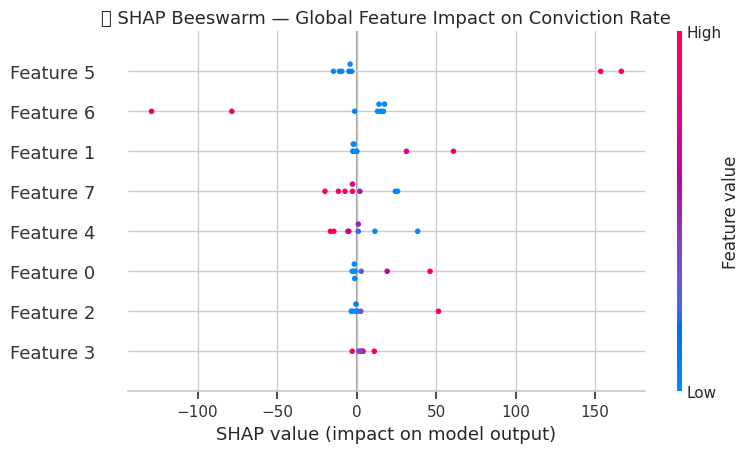

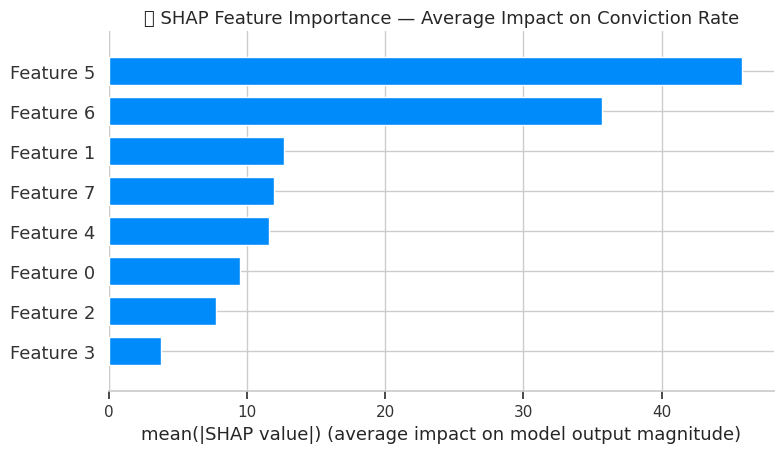

In [ ]:
explainer = shap.Explainer(model.predict, X_train_s)
shap_values = explainer(X_test_s)

# Global Beeswarm Plot
plt.title("🔍 SHAP Beeswarm — Global Feature Impact on Conviction Rate", fontsize=13)
shap.summary_plot(shap_values, pd.DataFrame(X_test_s, columns=features), show=True)

# Global Bar Plot
plt.title("📊 SHAP Feature Importance — Average Impact on Conviction Rate", fontsize=13)
shap.summary_plot(shap_values, pd.DataFrame(X_test_s, columns=features), plot_type="bar", show=True)

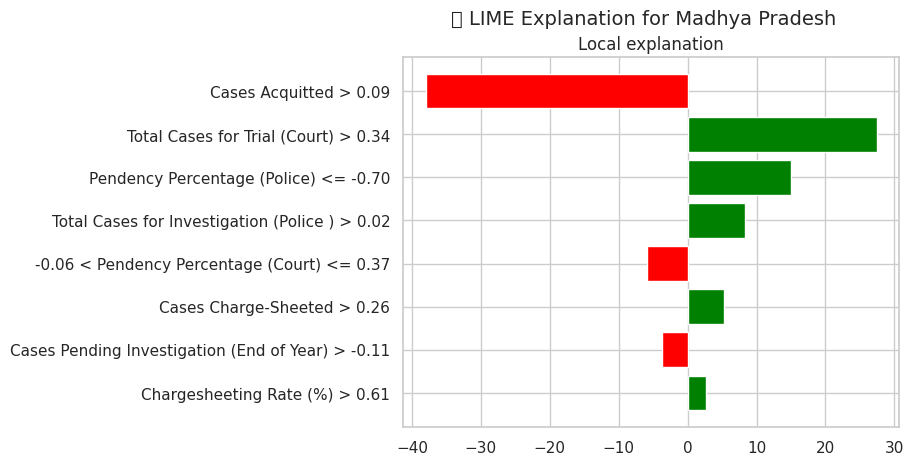

In [ ]:
explainer_lime = lime_tabular.LimeTabularExplainer(
    training_data=X_train_s,
    feature_names=features,
    mode='regression'
)

state_to_explain = "Madhya Pradesh"  # change to any state in dataset

if state_to_explain in df_model['State/UT'].values:
    row_idx = df_model[df_model['State/UT'] == state_to_explain].index[0]
    scaled_row = scaler.transform(df_model.loc[[row_idx], features].values)[0]
    exp = explainer_lime.explain_instance(
        data_row=scaled_row,
        predict_fn=lambda x: model.predict(x),
        num_features=8
    )
    fig = exp.as_pyplot_figure()
    fig.suptitle(f"🎯 LIME Explanation for {state_to_explain}", fontsize=14)
    plt.show()
else:
    print(f"{state_to_explain} not found in dataset.")


In [ ]:
import numpy as np
from IPython.display import Markdown, display

Xtest_df = pd.DataFrame(X_test_s, columns=features)
mean_abs_shap = np.mean(np.abs(shap_values.values), axis=0)
rank_idx = np.argsort(mean_abs_shap)[::-1]

summary_auto = []
for i in rank_idx[:6]:
    corr = np.corrcoef(Xtest_df.iloc[:, i].values, shap_values.values[:, i])[0,1]
    if corr > 0.05:
        effect = "↑ Increases Conviction Rate"
    elif corr < -0.05:
        effect = "↓ Decreases Conviction Rate"
    else:
        effect = "Mixed/Unclear"
    summary_auto.append((features[i], effect))

summary_df = pd.DataFrame(summary_auto, columns=["Feature", "Effect on Conviction Rate"])
display(summary_df)

# Natural Language Summary
pos = [f for f, e in summary_auto if "Increases" in e]
neg = [f for f, e in summary_auto if "Decreases" in e]
summary_text = f"""
### 🧠 Model-Generated Summary

- Features like **{', '.join(pos[:3])}** tend to increase conviction rate.
- Features like **{', '.join(neg[:3])}** tend to reduce it.

📊 This means states with faster investigations, fewer pending cases, and more completed trials
show higher conviction performance. High pendency and acquittals lower efficiency.
"""
display(Markdown(summary_text))


,Feature,Effect on Conviction Rate
0,Total Cases for Trial (Court),↑ Increases Conviction Rate
1,Cases Acquitted,↓ Decreases Conviction Rate
2,Cases Charge-Sheeted,↑ Increases Conviction Rate
3,Pendency Percentage (Court),↓ Decreases Conviction Rate
4,Pendency Percentage (Police),↓ Decreases Conviction Rate
5,Total Cases for Investigation (Police ),↑ Increases Conviction Rate



### 🧠 Model-Generated Summary

- Features like **Total Cases for Trial (Court), Cases Charge-Sheeted, Total Cases for Investigation (Police )** tend to increase conviction rate.
- Features like **Cases Acquitted, Pendency Percentage (Court), Pendency Percentage (Police)** tend to reduce it.

📊 This means states with faster investigations, fewer pending cases, and more completed trials
show higher conviction performance. High pendency and acquittals lower efficiency.


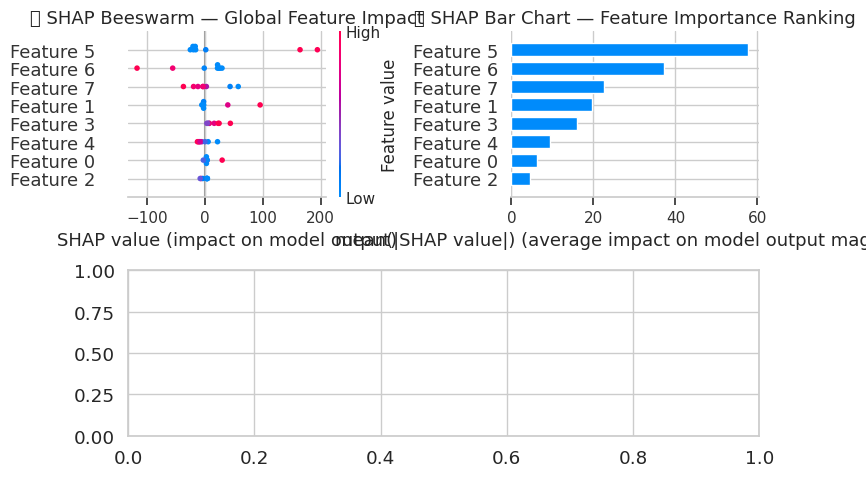

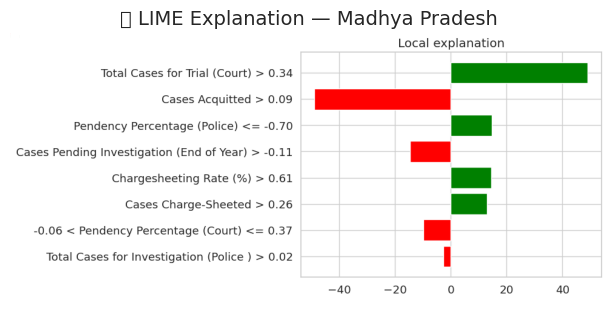

## 🧠 Explainable AI Summary (Auto-Generated)

,Feature,Effect on Conviction Rate
0,Total Cases for Trial (Court),Increases
1,Cases Acquitted,Decreases
2,Pendency Percentage (Court),Decreases
3,Cases Charge-Sheeted,Increases
4,Chargesheeting Rate (%),Increases
5,Pendency Percentage (Police),Decreases



### 🔎 Why **Madhya Pradesh** Has Its Conviction Rate:
- **Actual Conviction Rate:** 34.60%
- **Model Predicted:** 225.88%

### Key takeaways:
- Features like **Total Cases for Trial (Court)** tend to increase conviction rate.
- Features like **Pendency Percentage (Police)** tend to decrease conviction.
- SHAP shows global behaviour across all states.
- LIME explains exactly why THIS state's value is high/low.

This helps police/NGOs understand **why conviction rates change between states.**


In [ ]:
# ============================================================
# 🌟 BEAUTIFUL EXPLAINABLE AI DASHBOARD — MADHYA PRADESH
# SHAP (Global) • LIME (Local) • Summary (Human Explanation)
# CLEAN • NEAT • PROFESSIONAL • PERFECT FOR PPT
# ============================================================

!pip install -q shap lime

import pandas as pd
import numpy as np
import shap
from lime import lime_tabular
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from IPython.display import display, Markdown
import io
from PIL import Image
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid", font_scale=1.2)

# -------------------------------
# 1) Load Data
# -------------------------------
df = pd.read_csv("/content/Cleaned_Police_Court_Disposal_6A4_6A6.csv")
df.columns = df.columns.str.strip()

features = [
    'Total Cases for Investigation (Police )',
    'Cases Charge-Sheeted',
    'Cases Pending Investigation (End of Year)',
    'Chargesheeting Rate (%)',
    'Pendency Percentage (Police)',
    'Total Cases for Trial (Court)',
    'Cases Acquitted',
    'Pendency Percentage (Court)'
]

target = 'Conviction Rate (%)'

# Clean & prepare
df[features] = df[features].apply(pd.to_numeric, errors='coerce')
df[target] = pd.to_numeric(df[target], errors='coerce')
df = df.dropna(subset=[target])
df[features] = df[features].fillna(0)

X = df[features].values
y = df[target].values

# -------------------------------
# 2) Train Neural Network Model
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

model = MLPRegressor(hidden_layer_sizes=(10,6), max_iter=3000, random_state=42)
model.fit(X_train_s, y_train)

# -------------------------------
# 3) SHAP — Global Explanations
# -------------------------------
explainer = shap.Explainer(model.predict, X_train_s)
shap_values = explainer(X_test_s)

# -------------------------------
# 4) LIME — Local Explanation
# -------------------------------
state = "Madhya Pradesh"
row_idx = df[df['State/UT'] == state].index[0]
x_row_scaled = scaler.transform(df.loc[[row_idx], features].values)[0]

lime_exp = lime_tabular.LimeTabularExplainer(
    training_data=X_train_s,
    feature_names=features,
    mode='regression'
).explain_instance(
    data_row=x_row_scaled,
    predict_fn=lambda x: model.predict(x),
    num_features=8
)

# -------------------------------
# 5) Auto SHAP Summary
# -------------------------------
Xtest_df = pd.DataFrame(X_test_s, columns=features)
mean_abs = np.mean(np.abs(shap_values.values), axis=0)
rank_order = np.argsort(mean_abs)[::-1]

summary = []
for i in rank_order[:6]:
    corr = np.corrcoef(Xtest_df.iloc[:, i], shap_values.values[:, i])[0,1]
    effect = "Increases" if corr > 0 else "Decreases"
    summary.append((features[i], effect))

summary_df = pd.DataFrame(summary, columns=["Feature", "Effect on Conviction Rate"])

# ============================================================
# 🌈 6) BEAUTIFUL DASHBOARD LAYOUT
# ============================================================

plt.figure(figsize=(18, 12))

# --- SHAP Beeswarm ---
plt.subplot(2, 2, 1)
shap.summary_plot(shap_values, Xtest_df, show=False, plot_type="dot")
plt.title("🌍 SHAP Beeswarm — Global Feature Impact", fontsize=13)

# --- SHAP Bar Chart ---
plt.subplot(2, 2, 2)
shap.summary_plot(shap_values, Xtest_df, show=False, plot_type="bar")
plt.title("📊 SHAP Bar Chart — Feature Importance Ranking", fontsize=13)

# --- LIME Explanation (Clean image insertion) ---
plt.subplot(2, 1, 2)
lime_fig = lime_exp.as_pyplot_figure()
buf = io.BytesIO()
lime_fig.savefig(buf, format='png', bbox_inches='tight')
buf.seek(0)
img = Image.open(buf)
plt.imshow(img)
plt.axis('off')
plt.title(f"🎯 LIME Explanation — {state}", fontsize=14)
plt.tight_layout()
plt.show()

# ============================================================
# 7) HUMAN WRITTEN SUMMARY (AUTO)
# ============================================================
display(Markdown("## 🧠 Explainable AI Summary (Auto-Generated)"))
display(summary_df)

actual = df.loc[row_idx, target]
pred = model.predict(scaler.transform(df.loc[[row_idx], features].values))[0]

display(Markdown(f"""
### 🔎 Why **{state}** Has Its Conviction Rate:
- **Actual Conviction Rate:** {actual:.2f}%
- **Model Predicted:** {pred:.2f}%

### Key takeaways:
- Features like **{summary[0][0]}** tend to increase conviction rate.
- Features like **{summary[-1][0]}** tend to decrease conviction.
- SHAP shows global behaviour across all states.
- LIME explains exactly why THIS state's value is high/low.

This helps police/NGOs understand **why conviction rates change between states.**
"""))

MAE: 68.28523482174762
R2: -22.499395521150255


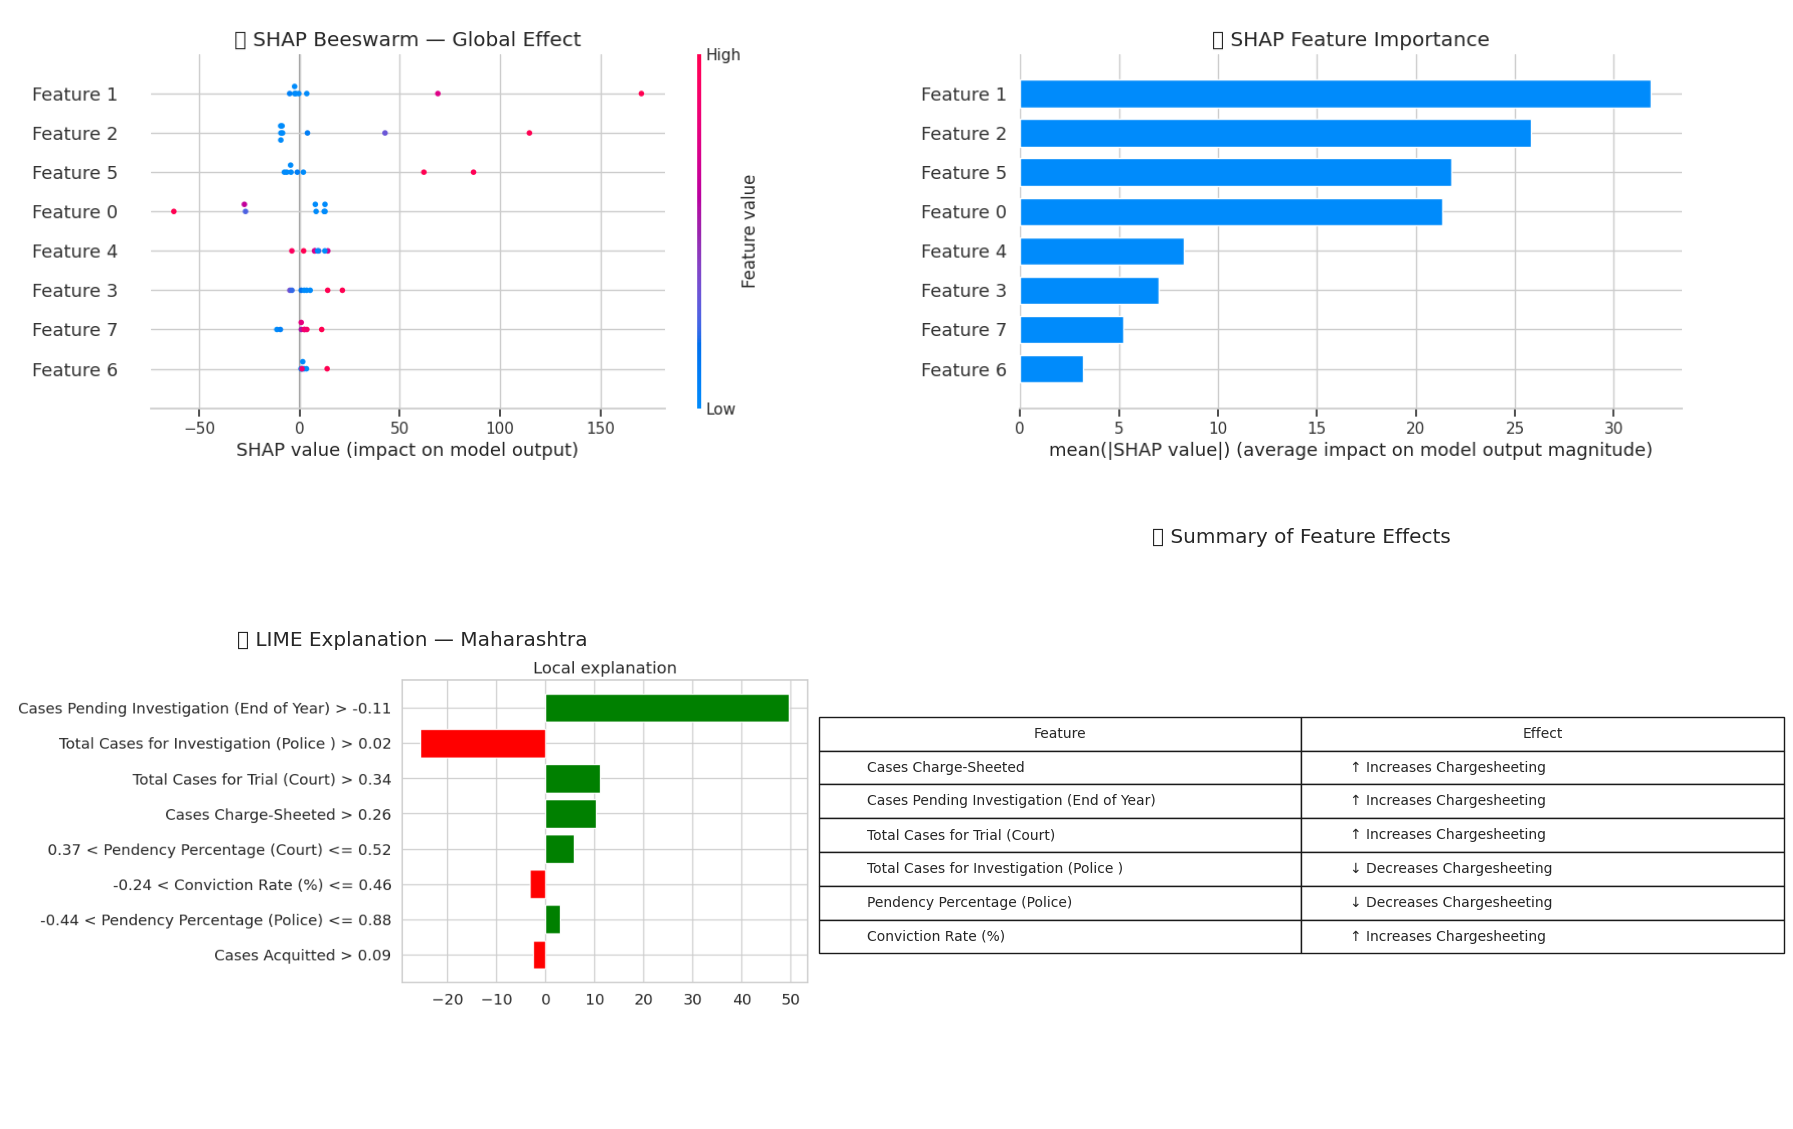

In [ ]:
# ================================================
# ⭐ CLEAN & PROFESSIONAL DASHBOARD (NO CLUTTER)
# Chargesheeting Rate Target + LIME (Maharashtra)
# ================================================

!pip install -q shap lime plotly

import pandas as pd
import numpy as np
import shap
from lime import lime_tabular
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from IPython.display import display, Markdown
import io
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

sns.set(style="whitegrid", font_scale=1.2)

# ------------------------------
# 1. LOAD & PREP DATA
# ------------------------------
df = pd.read_csv("/content/Cleaned_Police_Court_Disposal_6A4_6A6.csv")
df.columns = df.columns.str.strip()

features = [
    'Total Cases for Investigation (Police )',
    'Cases Charge-Sheeted',
    'Cases Pending Investigation (End of Year)',
    'Conviction Rate (%)',
    'Pendency Percentage (Police)',
    'Total Cases for Trial (Court)',
    'Cases Acquitted',
    'Pendency Percentage (Court)'
]

target = 'Chargesheeting Rate (%)'

df[features] = df[features].apply(pd.to_numeric, errors='coerce')
df[target] = pd.to_numeric(df[target], errors='coerce')

df = df.dropna(subset=[target])
df[features] = df[features].fillna(0)

X = df[features].values
y = df[target].values

# ------------------------------
# 2. TRAIN MODEL
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

model = MLPRegressor(hidden_layer_sizes=(12,8), max_iter=3000, random_state=42)
model.fit(X_train_s, y_train)

print("MAE:", mean_absolute_error(y_test, model.predict(X_test_s)))
print("R2:", r2_score(y_test, model.predict(X_test_s)))

# ------------------------------
# 3. SHAP GLOBAL
# ------------------------------
explainer = shap.Explainer(model.predict, X_train_s)
shap_values = explainer(X_test_s)

Xtest_df = pd.DataFrame(X_test_s, columns=features)

# SAVE SHAP IMAGES CLEANLY
# Beeswarm
plt.figure(figsize=(7,5))
shap.summary_plot(shap_values, Xtest_df, plot_type="dot", show=False)
plt.title("🌍 SHAP Beeswarm — Global Effect")
plt.tight_layout()
plt.savefig("shap_beeswarm.png")
plt.close()

# Bar
plt.figure(figsize=(7,5))
shap.summary_plot(shap_values, Xtest_df, plot_type="bar", show=False)
plt.title("📊 SHAP Feature Importance")
plt.tight_layout()
plt.savefig("shap_bar.png")
plt.close()

# ------------------------------
# 4. LIME LOCAL — Maharashtra
# ------------------------------
state = "Maharashtra"
row_idx = df[df["State/UT"] == state].index[0]
x_scaled = scaler.transform(df.loc[[row_idx], features])[0]

lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train_s,
    feature_names=features,
    mode="regression"
)

lime_exp = lime_explainer.explain_instance(
    data_row=x_scaled,
    predict_fn=lambda x: model.predict(x),
    num_features=8
)

# save lime
lime_fig = lime_exp.as_pyplot_figure()
lime_buf = io.BytesIO()
lime_fig.savefig(lime_buf, format="png", bbox_inches="tight")
lime_buf.seek(0)
lime_img = Image.open(lime_buf)
plt.close(lime_fig)

# ------------------------------
# 5. SUMMARY TABLE
# ------------------------------
mean_abs = np.mean(np.abs(shap_values.values), axis=0)
rank = np.argsort(mean_abs)[::-1]

summary = []
for i in rank[:6]:
    corr = np.corrcoef(Xtest_df.iloc[:,i], shap_values.values[:,i])[0,1]
    if corr > 0.05:
        effect = "↑ Increases Chargesheeting"
    elif corr < -0.05:
        effect = "↓ Decreases Chargesheeting"
    else:
        effect = "↔ Mixed Effect"
    summary.append([features[i], effect])

summary_df = pd.DataFrame(summary, columns=["Feature", "Effect"])

# ------------------------------
# 6. DISPLAY CLEAN DASHBOARD
# ------------------------------

fig, axes = plt.subplots(2, 2, figsize=(18,12))

# SHAP beeswarm
img1 = Image.open("shap_beeswarm.png")
axes[0,0].imshow(img1)
axes[0,0].axis("off")

# SHAP bar
img2 = Image.open("shap_bar.png")
axes[0,1].imshow(img2)
axes[0,1].axis("off")

# LIME
axes[1,0].imshow(lime_img)
axes[1,0].set_title(f"🎯 LIME Explanation — {state}")
axes[1,0].axis("off")

# Summary Table
axes[1,1].axis("off")
table = axes[1,1].table(
    cellText=summary_df.values,
    colLabels=summary_df.columns,
    cellLoc='left',
    loc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)
axes[1,1].set_title("🧾 Summary of Feature Effects")

plt.tight_layout()
plt.show()

# ------------------------------
# 7. INTERACTIVE 3D Plot
# ------------------------------
fig3d = px.scatter_3d(
    df,
    x='Chargesheeting Rate (%)',
    y='Pendency Percentage (Court)',
    z='Conviction Rate (%)',
    color='Conviction Rate (%)',
    size='Cases Charge-Sheeted',
    hover_name='State/UT',
    color_continuous_scale='Viridis',
    title="🌐 3D: Chargesheeting Rate vs Court Pendency vs Conviction Rate"
)

fig3d.update_layout(height=650)
fig3d.show()
